<a href="https://colab.research.google.com/github/nuraishasb/obesity/blob/main/obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import sys, os
if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/gdrive')
  path_to_file = '/content/gdrive/My Drive'
  os.chdir(path_to_file)
  !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [39]:
# load data
import pandas as pd
data = pd.read_excel('obesity.xlsx')
data.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [40]:
data.corr()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
Sex,1.000000,-0.182114,-0.690250,0.068580,0.059621,0.146067,0.044877,-0.011508,0.196608,0.012885,-0.027745,-0.086369,-0.005656,0.028805,-0.252446
Age,-0.182114,1.000000,0.115491,-0.161475,-0.272612,-0.394701,0.328642,0.047053,-0.077778,0.026510,-0.203458,0.337484,-0.254816,-0.689950,0.579812
Height,-0.690250,0.115491,1.000000,-0.165359,-0.031478,-0.090057,-0.055054,-0.000186,-0.141490,-0.026460,-0.029721,0.076698,0.001916,-0.003872,0.161563
Overweight_Obese_Family,0.068580,-0.161475,-0.165359,1.000000,0.255797,0.244100,-0.183549,-0.012842,0.213165,0.071693,0.274573,-0.166033,0.094216,0.098551,-0.292041
Consumption_of_Fast_Food,0.059621,-0.272612,-0.031478,0.255797,1.000000,0.340379,-0.336837,-0.022824,0.238982,0.052156,0.265310,-0.322823,0.050916,0.183102,-0.380463
Frequency_of_Consuming_Vegetables,0.146067,-0.394701,-0.090057,0.244100,0.340379,1.000000,-0.400581,-0.022553,0.143130,0.026497,0.205080,-0.263694,0.099946,0.234800,-0.544496
Number_of_Main_Meals_Daily,0.044877,0.328642,-0.055054,-0.183549,-0.336837,-0.400581,1.000000,0.109361,-0.107655,0.041099,-0.195050,0.226734,-0.064786,-0.240188,0.509390
Food_Intake_Between_Meals,-0.011508,0.047053,-0.000186,-0.012842,-0.022824,-0.022553,0.109361,1.000000,-0.035156,0.002084,0.014730,-0.004277,-0.036054,-0.035212,0.129327
Smoking,0.196608,-0.077778,-0.141490,0.213165,0.238982,0.143130,-0.107655,-0.035156,1.000000,0.065356,0.122064,-0.089587,0.040799,0.017947,-0.178526
Liquid_Intake_Daily,0.012885,0.026510,-0.026460,0.071693,0.052156,0.026497,0.041099,0.002084,0.065356,1.000000,0.048060,0.019584,-0.035167,-0.007907,-0.031608


#### **Demographic Analysis**

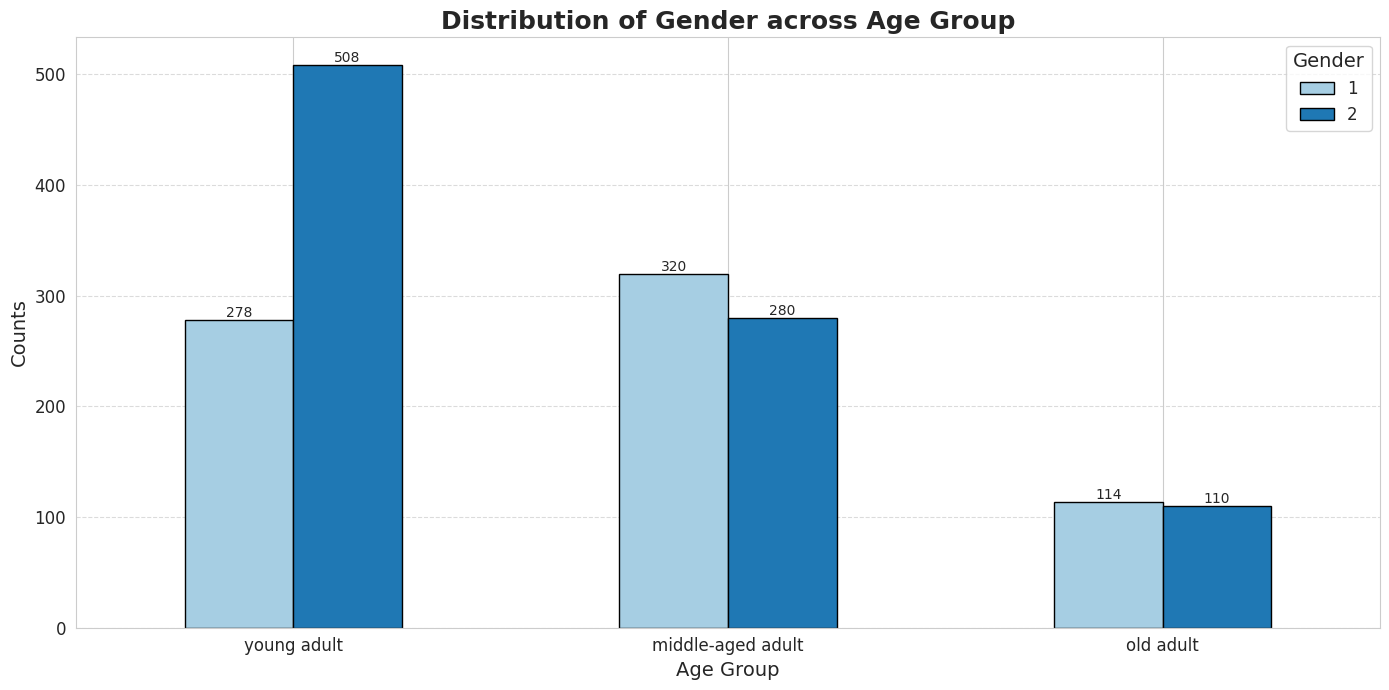

In [41]:
# understanding demographic representation

# 1. distribution of gender across age group

# age group
data1 = data.copy()
data1['Age_Group'] = pd.cut(data1['Age'], bins=[17, 31, 45, 55], labels=['young adult', 'middle-aged adult', 'old adult'])

sub01 = data1.groupby(['Age_Group', 'Sex'], observed=True).size().reset_index(name='counts')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

pivot_data = sub01.pivot_table(index='Age_Group', columns='Sex', values='counts', fill_value=0, observed=True)
ax = pivot_data.plot(kind='bar', stacked=False, figsize=(14, 7), color=sns.color_palette('Paired'), edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Gender across Age Group', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.show()

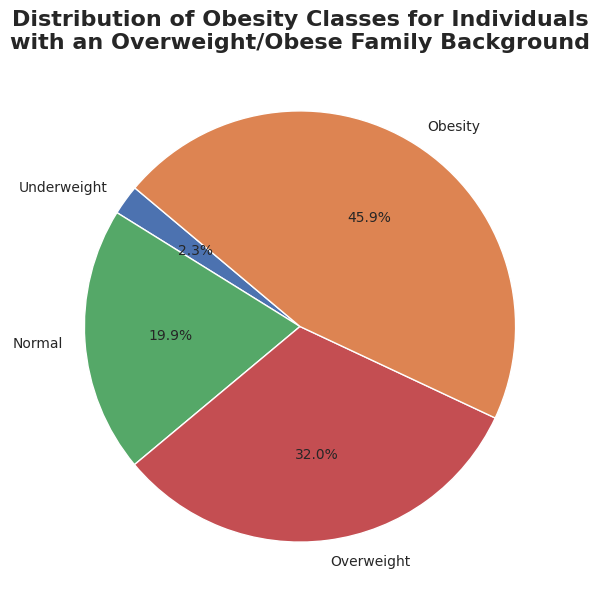

In [42]:
# 2. distribution of obesity classes for individuals with overweight/obese family bg

sub02 = data[(data['Overweight_Obese_Family'] == 1)]
freq01 = sub02.groupby(['Class']).size().reset_index(name='counts')

labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']
plt.figure(figsize=(10, 7))
plt.pie(freq01['counts'], labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#55a868', '#c44e52', '#dd8452'])
plt.title('Distribution of Obesity Classes for Individuals\nwith an Overweight/Obese Family Background', fontsize=16, fontweight='bold')

plt.show()


#### **Behavorial Patterns**


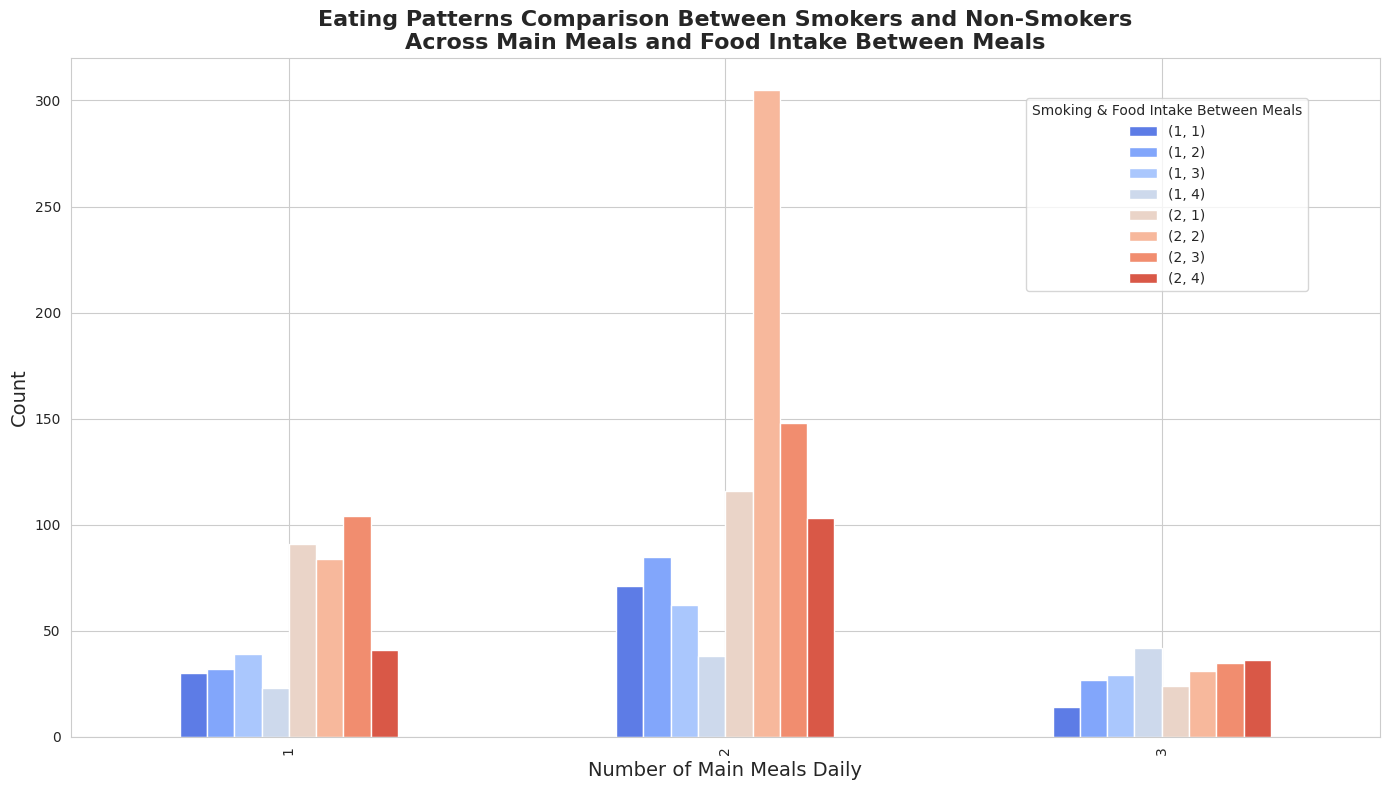

In [43]:
# 1. eating patterns b/w smokers & non-smokers -- eating and snacking habits

sub03 = data.groupby(['Smoking', 'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals']).size().reset_index(name='counts')
pivot = sub03.pivot_table(index='Number_of_Main_Meals_Daily', columns=['Smoking', 'Food_Intake_Between_Meals'], values='counts', fill_value=0)

pivot.plot(kind='bar', figsize=(14, 8), stacked=False, color=sns.color_palette("coolwarm", len(pivot.columns)))

plt.title('Eating Patterns Comparison Between Smokers and Non-Smokers\nAcross Main Meals and Food Intake Between Meals', fontsize=16, fontweight='bold')
plt.xlabel('Number of Main Meals Daily', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Smoking & Food Intake Between Meals', bbox_to_anchor=(0.95, 0.95), loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

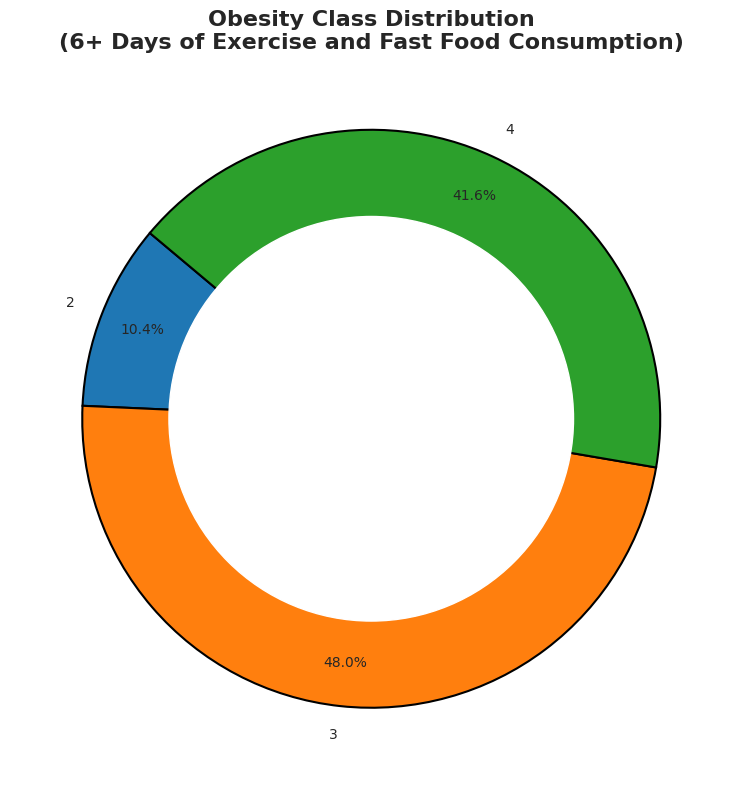

In [44]:
# 2. exercise==yes, food intake between meals vary. analyse distribution of obesity level

sub04 =  data[(data['Physical_Excercise'] == 5) & (data['Consumption_of_Fast_Food'] == 1)]
freq02 = sub04.groupby(['Class']).size().reset_index(name='counts')

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set3", len(freq02))

plt.pie(freq02['counts'], labels=freq02['Class'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("tab10"), wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(center_circle)

plt.title('Obesity Class Distribution\n(6+ Days of Exercise and Fast Food Consumption)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

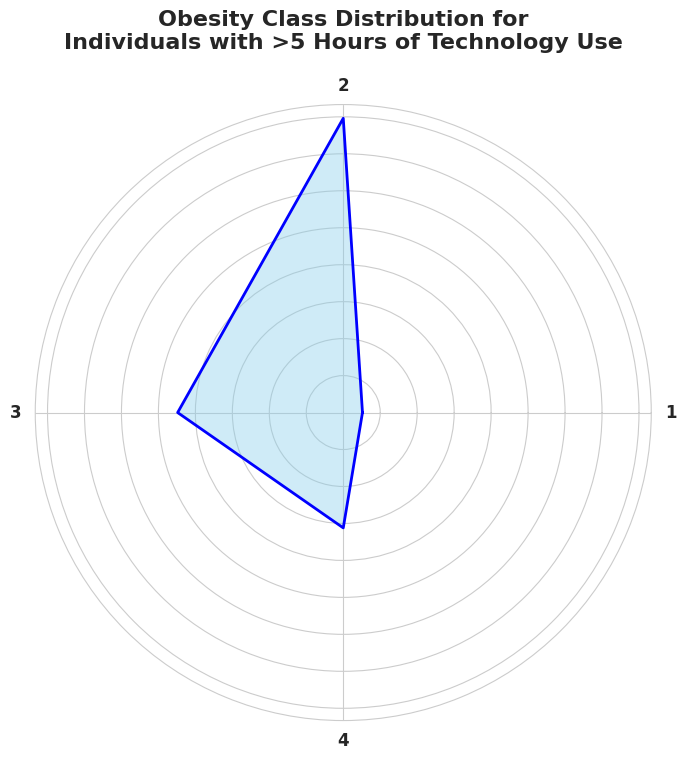

In [45]:
# 3. obesity dist across use of technology

sub05 = data[(data['Schedule_Dedicated_to_Technology'] == 3)]
freq03 = sub05.groupby(['Class']).size().reset_index(name='counts')

import numpy as np
angles = np.linspace(0, 2 * np.pi, len(freq03), endpoint=False).tolist()  # Set angles for each class
values = freq03['counts'].tolist()  # Counts as values
values += values[:1]  # Repeat the first value at the end to close the circular plot
angles += angles[:1]  # Close the circle

# Start plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

# Add labels
ax.set_yticklabels([])  # Hide radial ticks for cleaner look
ax.set_xticks(angles[:-1])  # Set class labels at each angle
ax.set_xticklabels(freq03['Class'], fontsize=12, fontweight='bold')

# Title
plt.title('Obesity Class Distribution for\nIndividuals with >5 Hours of Technology Use', fontsize=16, fontweight='bold', pad=20)

plt.show()


#### **Predictive Modeling**

to include confusion matrix

In [46]:
# split train & test
from sklearn.model_selection import train_test_split

y = data['Class']
x = data.drop(['Class'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

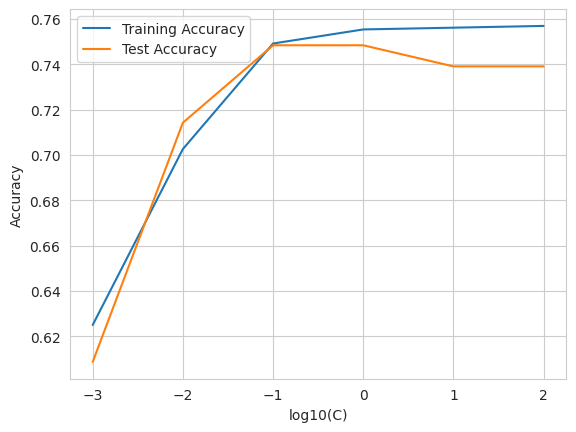

In [47]:
# 1. support vector machine
from sklearn import svm

# a. linear kernel
c_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy = []
tet_accuracy = []

for c in c_range:
  svm_linear = svm.SVC(kernel='linear', C=c)
  svm_linear.fit(x_train, y_train)
  train_accuracy.append(svm_linear.score(x_train, y_train))
  tet_accuracy.append(svm_linear.score(x_test, y_test))

plt.plot(np.log10(c_range), train_accuracy, label='Training Accuracy')
plt.plot(np.log10(c_range), tet_accuracy, label='Test Accuracy')
plt.xlabel('log10(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
svm_linear = svm.SVC(kernel='linear', C=0.1)
svm_linear.fit(x_train, y_train)
print('training accuracy:', svm_linear.score(x_train, y_train))
print('test accuracy:', svm_linear.score(x_test, y_test))
accsvmlinear = svm_linear.score(x_test, y_test)

training accuracy: 0.7492236024844721
test accuracy: 0.7484472049689441


In [49]:
# b. polynomial kernel
# using gridsearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_poly = svm.SVC(kernel='poly')

param_grid = {"degree": [0, 1, 2, 3, 4, 5, 6, 7, 8],
              "C": [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svm_poly, param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print('best parameters:', grid_search.best_params_)

svm_poly = grid_search.best_estimator_
svm_poly.fit(x_train, y_train)
print('training accuracy:', svm_poly.score(x_train, y_train))
print('test accuracy:', svm_poly.score(x_test, y_test))
accsvmpoly = svm_poly.score(x_test, y_test)

best parameters: {'C': 100, 'degree': 8}
training accuracy: 0.7445652173913043
test accuracy: 0.7453416149068323


In [50]:
# rbf kernel
#using gridsearch, once again, to find the best combination of model hyperparameters

svm_rbf = svm.SVC(kernel='rbf')

param_grid = {"gamma": [0.001, 0.01, 0.1, 1, 10, 100],
              "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(svm_rbf, param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print('best parameters:', grid_search.best_params_)

svm_rbf = grid_search.best_estimator_
svm_rbf.fit(x_train, y_train)
print('training accuracy:', svm_rbf.score(x_train, y_train))
print('test accuracy:', svm_rbf.score(x_test, y_test))
accsvmrbf = svm_rbf.score(x_test, y_test)

best parameters: {'C': 100, 'gamma': 0.01}
training accuracy: 0.9456521739130435
test accuracy: 0.8167701863354038


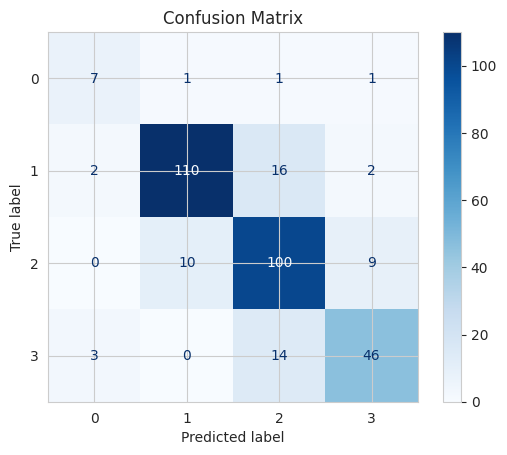

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred = svm_rbf.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

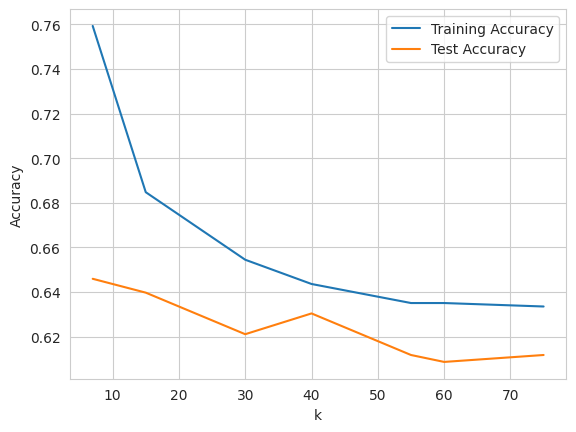

In [51]:
# 2. k-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier


krange = [7, 15, 30, 40, 55, 60, 75]
train_accuracy = []
test_accuracy = []

for k in krange:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  train_accuracy.append(knn.score(x_train, y_train))
  test_accuracy.append(knn.score(x_test, y_test))

plt.plot(krange, train_accuracy, label='Training Accuracy')
plt.plot(krange, test_accuracy, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(x_train, y_train)
print('training accuracy:', knn.score(x_train, y_train))
print('test accuracy:', knn.score(x_test, y_test))
accknn = knn.score(x_test, y_test)

training accuracy: 0.6436335403726708
test accuracy: 0.6304347826086957


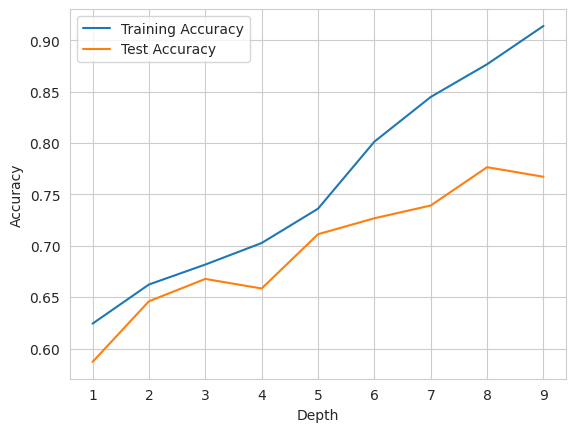

In [53]:
# 3. decision tree classifier
from sklearn.tree import DecisionTreeClassifier

depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_accuracy = []
test_accuracy = []

for depth in depth_range:
  dtc = DecisionTreeClassifier(max_depth = depth)
  dtc.fit(x_train, y_train)
  train_accuracy.append(dtc.score(x_train, y_train))
  test_accuracy.append(dtc.score(x_test, y_test))

plt.plot(depth_range, train_accuracy, label='Training Accuracy')
plt.plot(depth_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train, y_train)
print('training accuracy:', dtc.score(x_train, y_train))
print('test accuracy:', dtc.score(x_test, y_test))
accdtc = dtc.score(x_test, y_test)

training accuracy: 0.7360248447204969
test accuracy: 0.7111801242236024


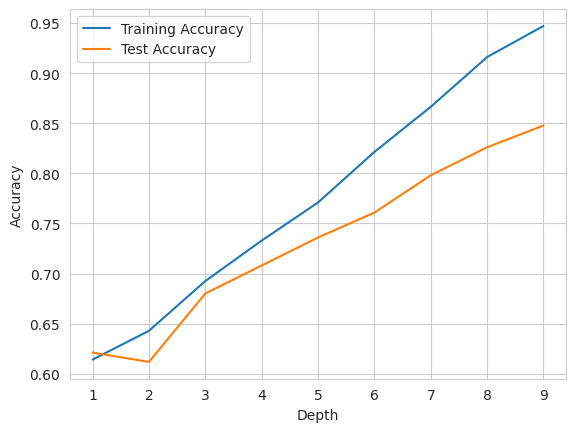

In [55]:
# random forest
from sklearn.ensemble import RandomForestClassifier

depth_range = [1, 2, 3, 4, 5, 6, 7, 8 , 9]
train_accuracy = []
test_accuracy = []

for depth in depth_range:
  rfc = RandomForestClassifier(max_depth = depth)
  rfc.fit(x_train, y_train)
  train_accuracy.append(rfc.score(x_train, y_train))
  test_accuracy.append(rfc.score(x_test, y_test))

plt.plot(depth_range, train_accuracy, label='Training Accuracy')
plt.plot(depth_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
rfc = RandomForestClassifier(max_depth = 5)
rfc.fit(x_train, y_train)
print('training accuracy:', rfc.score(x_train, y_train))
print('test accuracy:', rfc.score(x_test, y_test))
accrfc = rfc.score(x_test, y_test)

training accuracy: 0.765527950310559
test accuracy: 0.7329192546583851


In [57]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import ensemble

rf1 = ensemble.RandomForestClassifier()

param_grid = {'n_estimators': [10, 20, 30 , 40, 50],
              'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6, 7],
              'max_features': [3, 4, 5, 6, 7]}

grid_search = GridSearchCV(rf1, param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print('best parameters:', grid_search.best_params_)

rf1 = grid_search.best_estimator_
rf1.fit(x_train, y_train)
print('training accuracy:', rf1.score(x_train, y_train))
print('test accuracy:', rf1.score(x_test, y_test))
accrf1 = rf1.score(x_test, y_test)

best parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'n_estimators': 50}
training accuracy: 0.8858695652173914
test accuracy: 0.7950310559006211


In [58]:
rf2 = ensemble.RandomForestClassifier(n_estimators = 20, criterion ='gini', max_depth = 6, max_features = 3)
rf2.fit(x_train, y_train)
print('training accuracy:', rf2.score(x_train, y_train))
print('test accuracy:', rf2.score(x_test, y_test))
accrf2 = rf2.score(x_test, y_test)

training accuracy: 0.8105590062111802
test accuracy: 0.7484472049689441


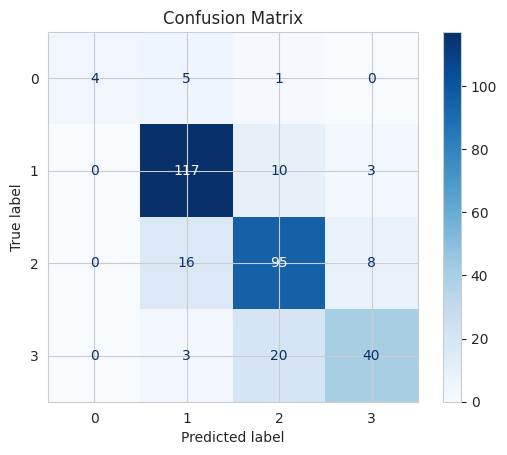

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred = rf1.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# comparing accuracies across all models:
models = pd.DataFrame({
    'Model':['SVM: Linear', 'SVM: Polynomial', 'SVM: RBF', 'KNN', 'DTC', 'RF','RF1', 'RF2'],
    'Accuracy':[accsvmlinear, accsvmpoly, accsvmrbf, accknn, accdtc, accrfc, accrf1, accrf2]
})
models

,Model,Accuracy
0,SVM: Linear,0.748447
1,SVM: Polynomial,0.745342
2,SVM: RBF,0.816770
3,KNN,0.630435
4,DTC,0.711180
5,RF,0.732919
6,RF1,0.795031
7,RF2,0.748447


#### **Cluster Analysis**

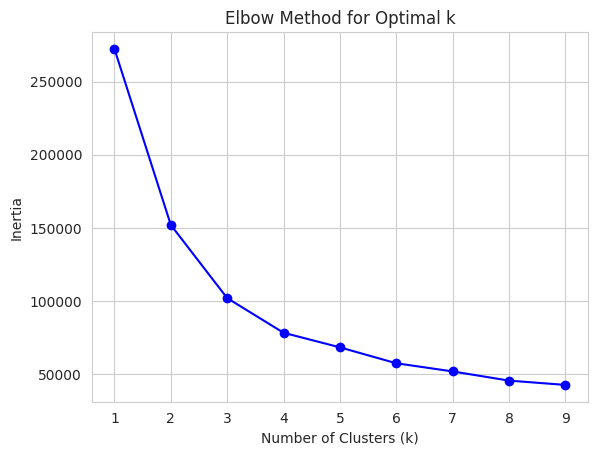

In [65]:
# k-means clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [67]:
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(data)

labels = kmeans.labels_
print("Cluster Labels:", labels)

Cluster Labels: [0 0 0 ... 2 2 2]


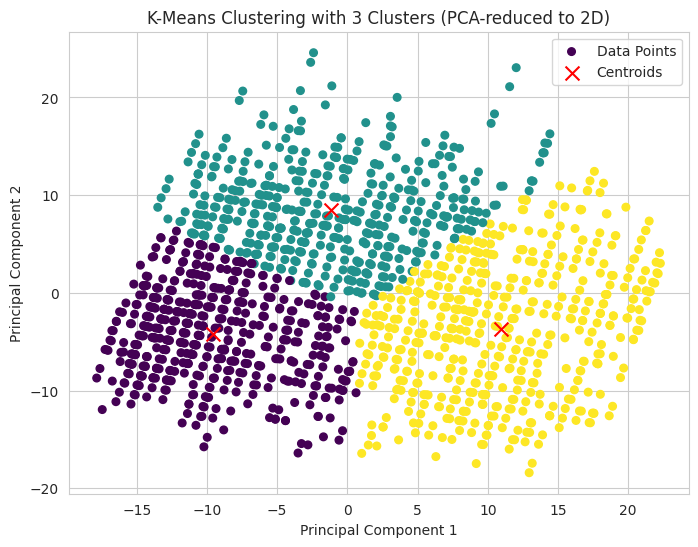

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data with 15 features
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
centroids_pca = pca.transform(centroids)

# Plot the data points with colors based on cluster assignment
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=30, label='Data Points')

# Plot the centroids in the reduced PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100, label='Centroids')

# Labels and title
plt.title("K-Means Clustering with 3 Clusters (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


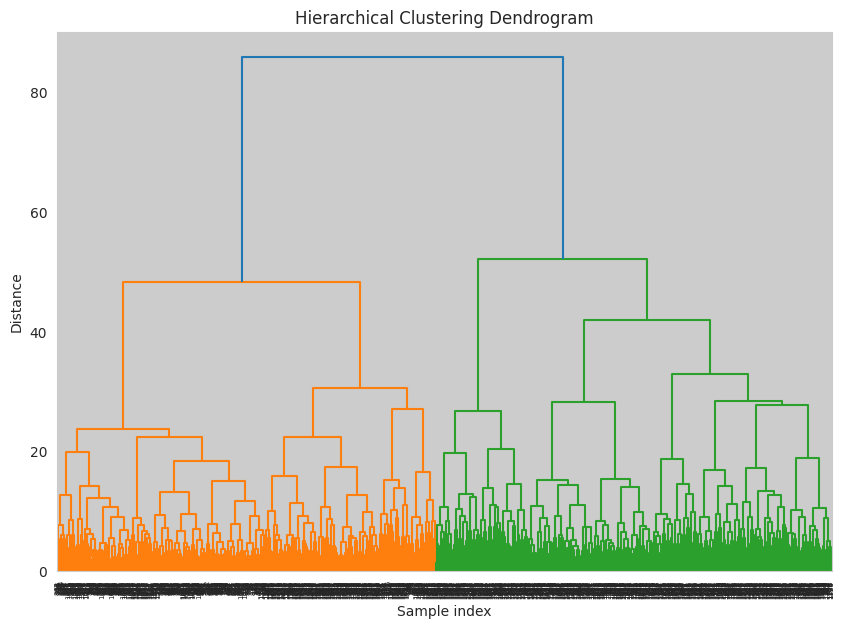

In [72]:
# hierarchical clustering

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Ward's method
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()




In [79]:
from scipy.cluster.hierarchy import fcluster

# Set a distance threshold or choose the number of clusters
# Here, `t` is the distance threshold. Use `criterion='maxclust'` to set the number of clusters.
num_clusters = 2
labels = fcluster(Z, num_clusters, criterion='maxclust')

# Print the labels for each data point
print("Cluster Labels:", labels)


Cluster Labels: [1 1 1 ... 2 2 2]


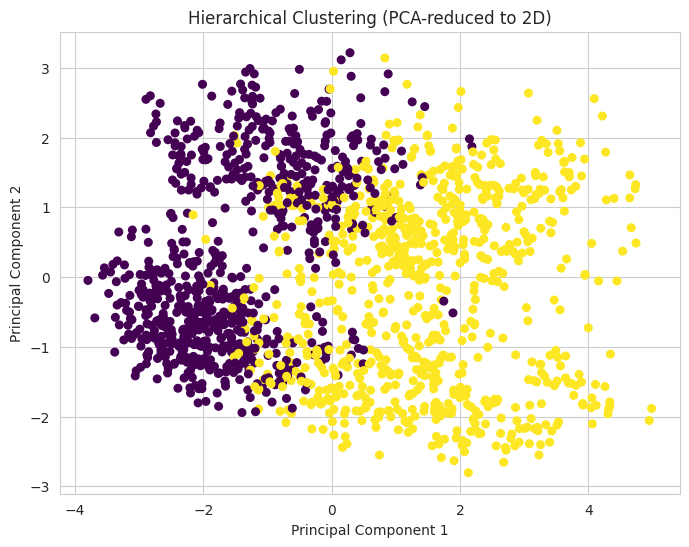

In [80]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the data points with colors based on hierarchical cluster assignment
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=30)
plt.title("Hierarchical Clustering (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
